<h1 style='color: blue; font-size: 36px; font-weight: bold;'>TECH CHALLENGE - FASE 2 - TIME SERIES</h1>

# O Problema

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Esta é a segunda fase do projeto Pós-Graduação Tech em Data Analytics da FIAP. Neste case, fomos escalados para um time de investimentos para realizar um modelo preditivo com dados do índice Bovespa (IBovespa) para criar uma série temporal e prever diariamente o fechamento da base.

# Objetivo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Nosso objetivo é criar um modelo preditivo capaz de prever diariamente os valores de fechamento do índice Bovespa (IBovespa)  com uma acurácia adequada (acima de 70%).

# Introdução

## O que é o Índice Bovespa?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O Ibovespa é o índice que mede o desempenho das ações de empresas com grande volume de negociação na B3, a Bolsa de Valores oficial do Brasil onde ocorrem as transações do mercado acionário nacional.

## Por que o Índice Bovespa é tão importante?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Por ser o principal índice de desempenho do mercado de ações da Bolsa de Valores do Brasil, o índice Bovespa direciona de certa forma as atitudes que acionistas e investidores tomarão com suas carteiras de ações. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
    Como o índice é calculado pela B3 por meio da média de performance das ações mais negociadas nos últimos meses pela Bolsa de Valores, quando o índice "sobe", significa que as empresas que compõe o índice se valorizaram e então os acionistas ficam otimistas com o cenário do mercado. E quando índice "cai", o mercado fica mais atencioso e não tão agressivo.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Entender esse indicador é fundamental para investidores, pois com ele é possível analisar o momento da economia, o comportamento do mercado e definir melhores momentos de compra e venda.

# Obtenção dos Dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Os dados foram obtidos no site da investing e podem ser acessados por meio do link:
    
<https://br.investing.com/indices/bovespa-historical-data>

# Apresentação dos Dados

## Importanto Bibliotecas

In [1]:
#!pip install statsforecast
#!pip install prophet

In [2]:
# Bibliotecas para Análise a Manipulação de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import statsmodels.api as sm

# Bibliotecas para Análise das Séries Temporais
from statsmodels.tsa.seasonal import seasonal_decompose # Decomposição da Série Temporal
from statsmodels.tsa.stattools import adfuller # Teste de Dickey-Fuller
from statsmodels.tsa.stattools import acf, pacf # Análise de Autocorrelação e Autocorrelação Parcial
from statsforecast import StatsForecast

# Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA # ARIMA

# Modelos Naive (Baseline) e Seasonal Naive (Naive com Sazonalidade)
from statsforecast.models import Naive, SeasonalNaive

# Modelo Prophet
from prophet import Prophet

# Importando a Métrica de Erro
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='white')
%matplotlib inline

C:\Users\User\anaconda3\lib\site-packages\statsforecast\core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Visualização dos Dados

In [3]:
dados = pd.read_csv('Dados Históricos - Ibovespa.csv')
dados.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,02.01.2024,132.697,133.930,133.930,132.095,"8,44M","-1,11%"
1,28.12.2023,134.185,134.194,134.389,133.832,"7,81M","-0,01%"
2,27.12.2023,134.194,133.523,134.195,133.328,"6,17M","0,49%"
3,26.12.2023,133.533,132.753,133.645,132.753,"5,15M","0,59%"
4,22.12.2023,132.753,132.182,133.035,132.094,"8,23M","0,43%"


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Como podemos observar, em nosso DataFrame possuímos as seguintes colunas:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li><b>Data</b>: Intervalo de Tempo - Diário</li>
<li><b>Último</b>: Valor de Fechamento do Índice Bovespa</li>
<li><b>Abertura</b>: Valor de Abertura do Índice Bovespa</li>
<li><b>Máxima</b>: Valor Máximo Atingido do Índice Bovespa No Dia</li>
<li><b>Mínima</b>: Valor Mínimo Atingido do Índice Bovespa No Dia</li>
<li><b>Vol.</b>: Volume Negociado do Índice Bovespa</li>
<li><b>Var%</b>:Variação Percentual Diária do Índice Bovespa</li>

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Os dados de preço de fechamento, abertura, máxima, mínima, volume em M e variação em % do Índice Bovespa podem ser visualizados em intervalos de tempo: diário, semanal ou mensal. Nosso objetivo é realizar em previsão diária do valor de fechamento, portanto trabalharemos com os dados no intervalo de tempo diário e nossa variável target será a variável "Último".

In [4]:
dados.shape

(995, 7)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      995 non-null    object 
 1   Último    995 non-null    float64
 2   Abertura  995 non-null    float64
 3   Máxima    995 non-null    float64
 4   Mínima    995 non-null    float64
 5   Vol.      995 non-null    object 
 6   Var%      995 non-null    object 
dtypes: float64(4), object(3)
memory usage: 54.5+ KB


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Como podemos ver, os dados precisam ser tratados e ter seus tipos alterados. As Colunas Data, Vol. e Var% estão como object.

## Tratamento dos Dados

In [6]:
dados['Dia'] = pd.to_numeric(dados['Data'].apply(lambda x: x.split('.')[0]))
dados['Mês'] = pd.to_numeric(dados['Data'].apply(lambda x: x.split('.')[1]))
dados['Ano'] = pd.to_numeric(dados['Data'].apply(lambda x: x.split('.')[2]))
dados['Data_Corrigida'] = pd.to_datetime(
                                         dados['Ano'].astype(str) + '-' + 
                                         dados['Mês'].astype(str) + '-' + 
                                         dados['Dia'].astype(str)
                                        )
dados['Volume (M)'] = pd.to_numeric(dados['Vol.'].apply(lambda x: x.split('M')[0].replace(',', '.')))
dados['Variação (%)'] = pd.to_numeric(dados['Var%'].apply(lambda x: x.split('%')[0].replace(',', '.')))
dados.drop(columns=['Vol.', 'Var%', 'Data'], axis=1, inplace=True)
dados.head()

,Último,Abertura,Máxima,Mínima,Dia,Mês,Ano,Data_Corrigida,Volume (M),Variação (%)
0,132.697,133.930,133.930,132.095,2,1,2024,2024-01-02,8.44,-1.11
1,134.185,134.194,134.389,133.832,28,12,2023,2023-12-28,7.81,-0.01
2,134.194,133.523,134.195,133.328,27,12,2023,2023-12-27,6.17,0.49
3,133.533,132.753,133.645,132.753,26,12,2023,2023-12-26,5.15,0.59
4,132.753,132.182,133.035,132.094,22,12,2023,2023-12-22,8.23,0.43


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Último          995 non-null    float64       
 1   Abertura        995 non-null    float64       
 2   Máxima          995 non-null    float64       
 3   Mínima          995 non-null    float64       
 4   Dia             995 non-null    int64         
 5   Mês             995 non-null    int64         
 6   Ano             995 non-null    int64         
 7   Data_Corrigida  995 non-null    datetime64[ns]
 8   Volume (M)      995 non-null    float64       
 9   Variação (%)    995 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 77.9 KB


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Além dos tipos devidamente corrigidos, podemos ver que não temos dados nulos.

# Análise Exploratória dos Dados

## Estatísticas Descritivas

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora vamos verificar as estatísticas descritivas da nossa base, assim teremos uma noção melhor de como os dados estão se comportando.

In [8]:
dados[['Último', 'Abertura', 'Máxima', 'Mínima', 'Volume (M)', 'Variação (%)']].describe()

,Último,Abertura,Máxima,Mínima,Volume (M),Variação (%)
count,995.000000,995.000000,995.000000,995.00000,995.000000,995.000000
mean,109.858411,109.842847,110.919465,108.77277,11.208543,0.029739
std,11.515496,11.494359,11.230223,11.73592,3.067157,1.771303
min,63.570000,63.604000,67.604000,61.69100,3.840000,-14.780000
25%,103.725500,103.725500,104.930500,102.59200,9.095000,-0.805000
50%,111.696000,111.696000,112.709000,110.52200,10.960000,0.050000
75%,117.520500,117.530500,118.333500,116.56050,12.930000,0.960000
max,134.194000,134.194000,134.389000,133.83200,26.030000,13.910000


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Pontos que merecem destaque:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li>O valor máximo de fechamento e de abertura são os mesmos. Isso pode ocorrer por conta da variação que o índice Bovespa sofre ao longo do dia.</li>
<li>A média de fechamento e de abertura são muito próximas. Outra possível consequência da variação diária do índice Bovespa.</li>
<li>A maior variação de um dia para o outro foi de 13.91% e a menor foi de -14.78%. Será interessante descrobrirmos em qual dia isso ocorreu e tentar entender o motivo.</li>
<li>Os desvios padrão das variáveis "Último", "Abertura", "Máxima", "Mínima" e "Volume (M)", estão baixos, o que mostra que a distribuição dos dados fica bem perto da média. Entretanto, o desvio padrão da "Variação (%)" está alto, o que mostra que os dados estao espalhados longe da média. Uma vez que um desvio padrão alto sugere irregularidade nos dados, vamos analisar a presença de outliers em nossos dados.</li>    

### Verificação do Outliers

In [9]:
colunas = dados[['Último', 'Abertura', 'Máxima', 'Mínima', 'Volume (M)', 'Variação (%)']].columns
colunas

Index(['Último', 'Abertura', 'Máxima', 'Mínima', 'Volume (M)', 'Variação (%)'], dtype='object')

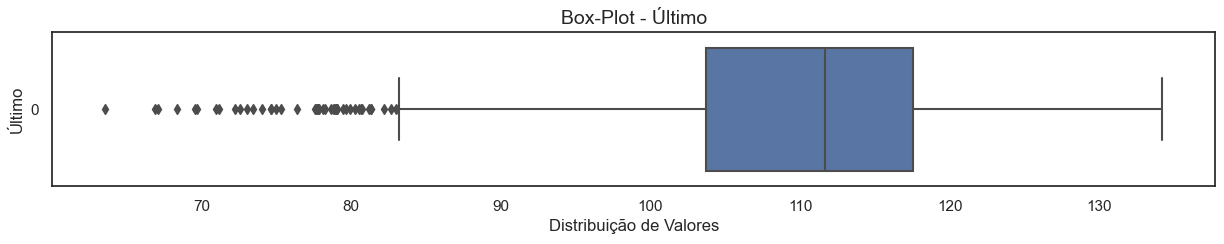

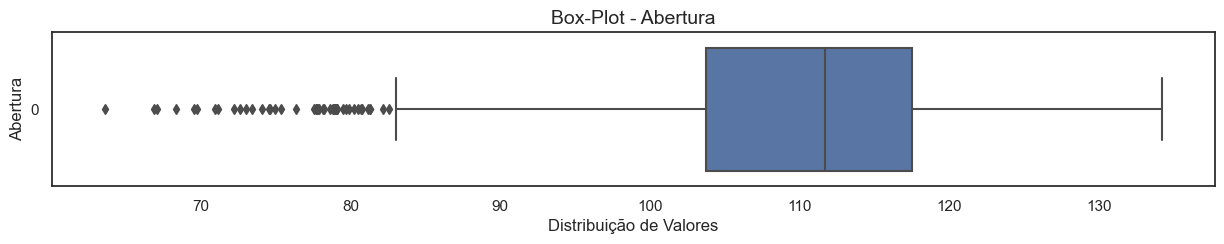

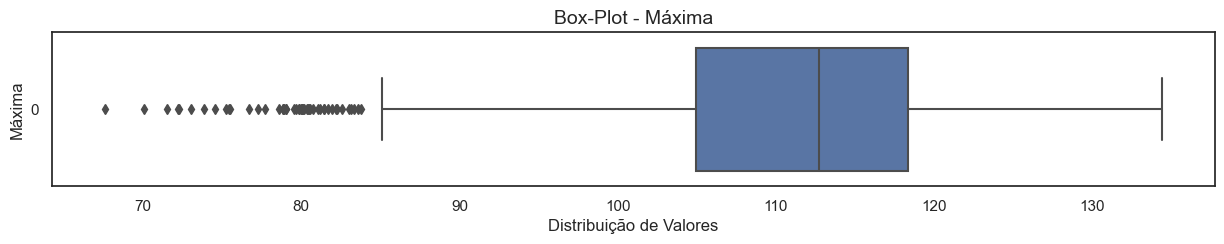

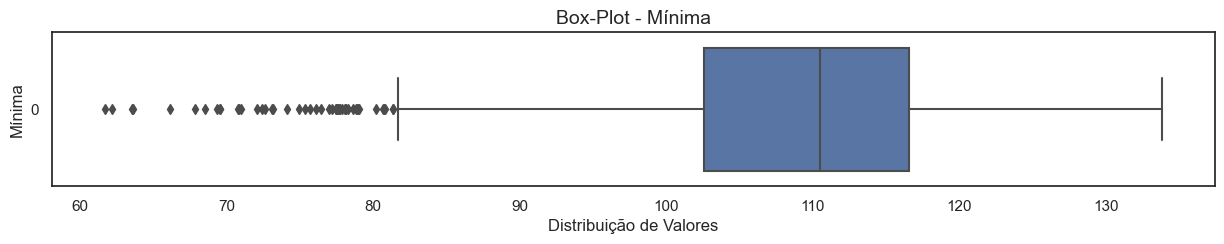

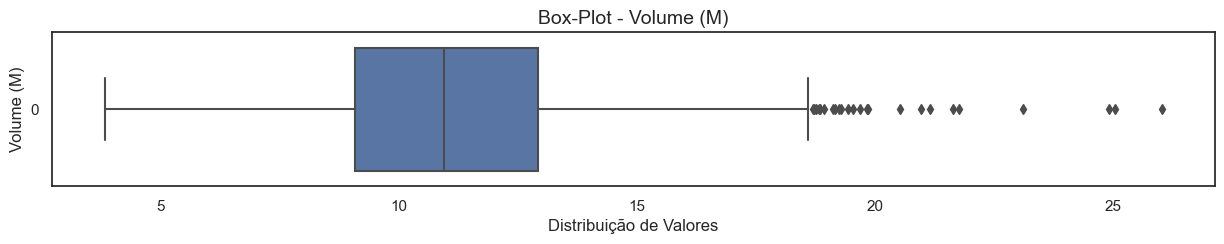

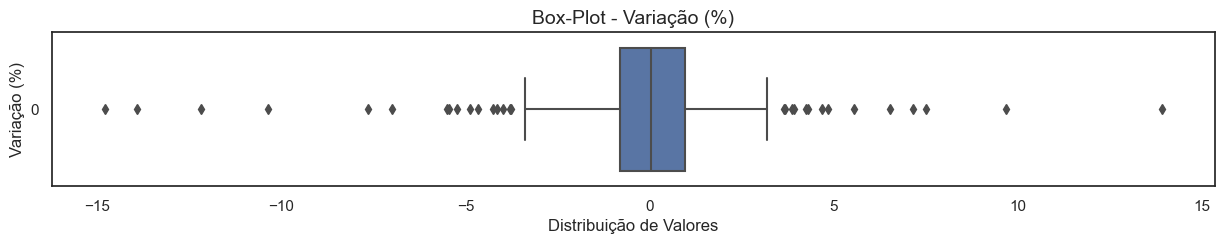

In [10]:
for col in colunas:
    plt.figure(figsize=(15,2))
    ax = sns.boxplot(data=dados[col], orient='h')
    ax.set_title(f'Box-Plot - {col}', fontsize=14)
    ax.set_xlabel('Distribuição de Valores', fontsize=12)
    ax.set_ylabel(col, fontsize=12)
    plt.show()

In [11]:
dados['Data_Corrigida'].max()

Timestamp('2024-01-02 00:00:00')

In [12]:
dados['Data_Corrigida'].min()

Timestamp('2020-01-02 00:00:00')

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Análise dos Outliers:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li>Para as variáveis "Último", "Abertura", "Máxima", "Mínima", nota-se uma assimetria à direita. Como estamos tratando de um índice econômico, e nossa base de dados inicía em 02-01-2020, é perfeitamente comum isso acontecer uma vez que o valor do índice no início do acompanhamento era bem menor e o índice cresce ao longo do tempo. Inclusive vimos como os valores mínimos se distanciam das médias, o que confirma essa assimetria.</li>
<li>Com o "Volume (M)" ocorre o contrário, a variável possui uma assimetria à esquerda. Isso é justificado por ser um dado de valor monetário, e como o valor cresce muito ao longo do tempo, o valor máximo nesse caso é que se distancia muito da média.</li>
<li>No caso da "Variação (%)" percebemos algo diferente, muitos outliers para ambos os lados, valores pouco concentrados ao redor da média, o que era esperado.</li> 

## Análise da Variação do Valor de Fechamento Mensal

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Para esta análise precisaremos construir um DataFrame com os resultados do fechamento mensal. Dessa forma, temos que:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li> O resultado mensal de fechamento será sempre o valor do último dia útil do mês.</li>   
<li> O resultado mensal de abertura será sempre o valor do primeiro dia útil do mês.</li> 
<li> O resultado mensal máximo será sempre o valor máximo atingido naquele mês.</li>  
<li> O resultado mensal mínimo será sempre o valor mínimo atingido naquele mês.</li>
<li> O resultado mensal do volume será a soma total do mês.</li>
<li> A variação mensal precisará ser recalculada com os novos valores de fechamento mensal.</li>

In [13]:
dados.head()

,Último,Abertura,Máxima,Mínima,Dia,Mês,Ano,Data_Corrigida,Volume (M),Variação (%)
0,132.697,133.930,133.930,132.095,2,1,2024,2024-01-02,8.44,-1.11
1,134.185,134.194,134.389,133.832,28,12,2023,2023-12-28,7.81,-0.01
2,134.194,133.523,134.195,133.328,27,12,2023,2023-12-27,6.17,0.49
3,133.533,132.753,133.645,132.753,26,12,2023,2023-12-26,5.15,0.59
4,132.753,132.182,133.035,132.094,22,12,2023,2023-12-22,8.23,0.43


In [14]:
# Dicionário com a tradução dos meses

meses_traducao = {
    'Jan': 'Jan',
    'Feb': 'Fev',
    'Mar': 'Mar',
    'Apr': 'Abr',
    'May': 'Mai',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Aug': 'Ago',
    'Sep': 'Set',
    'Oct': 'Out',
    'Nov': 'Nov',
    'Dec': 'Dez'
}

In [15]:
# Valores Mensais de Fechamento
ultimo_dia = dados.groupby(['Mês', 'Ano'])[['Data_Corrigida']].max().reset_index()
ultimo_dia['chave'] = ultimo_dia['Mês'].astype(str) + ultimo_dia['Ano'].astype(str)
ultimo_dia = pd.merge(ultimo_dia, dados[['Último', 'Data_Corrigida']], on='Data_Corrigida')

# Valores Mensais de Abertura
primeiro_dia = dados.groupby(['Mês', 'Ano'])[['Data_Corrigida']].min().reset_index()
primeiro_dia['chave'] = primeiro_dia['Mês'].astype(str) + primeiro_dia['Ano'].astype(str)
primeiro_dia = pd.merge(primeiro_dia, dados[['Abertura', 'Data_Corrigida']], on='Data_Corrigida')

# Valores Máximos Mensais
maximo_mensal = dados.groupby(['Mês', 'Ano'])[['Máxima']].max().reset_index()
maximo_mensal['chave'] = maximo_mensal['Mês'].astype(str) + maximo_mensal['Ano'].astype(str)

# Valores Mínimos Mensais
minimo_mensal = dados.groupby(['Mês', 'Ano'])[['Mínima']].min().reset_index()
minimo_mensal['chave'] = minimo_mensal['Mês'].astype(str) + minimo_mensal['Ano'].astype(str)

# Valores Mensais de Volume
volume_mensal = dados.groupby(['Mês', 'Ano'])[['Volume (M)']].sum().reset_index()
volume_mensal['chave'] = volume_mensal['Mês'].astype(str) + volume_mensal['Ano'].astype(str)

# Merge dos Dados
merge_1 = pd.merge(ultimo_dia[['Último', 'chave']], primeiro_dia[['Abertura', 'chave']], on='chave')
merge_2 = pd.merge(maximo_mensal[['Máxima', 'chave']], minimo_mensal[['Mínima', 'chave']], on='chave')
merge_3 = pd.merge(merge_1, merge_2, on='chave')
merge_4 = pd.merge(merge_3, volume_mensal, on='chave')

# DataFrame Mensal Final
dados_mensais = merge_4
dados_mensais['Data_Base'] = pd.to_datetime(
                                            dados_mensais['Ano'].astype(str) + '-' +  
                                            dados_mensais['Mês'].astype(str) + '-' + 
                                            '01'
                                            )
dados_mensais['Data_Eixo'] = dados_mensais['Data_Base'].apply(lambda x: x.strftime('%b')).map(meses_traducao)
dados_mensais = merge_4.drop(columns=['chave', 'Mês', 'Ano'])
dados_mensais = dados_mensais[['Data_Base', 'Data_Eixo','Último', 'Abertura', 'Máxima', 'Mínima', 'Volume (M)']]
dados_mensais = dados_mensais.sort_values(by=['Data_Base'], ascending=True).reset_index(drop=True)
dados_mensais['Variação (%)'] = round(dados_mensais['Último'].pct_change() * 100, 2)
dados_mensais.head()

,Data_Base,Data_Eixo,Último,Abertura,Máxima,Mínima,Volume (M),Variação (%)
0,2020-01-01,Jan,113.761,115.652,119.593,112.825,122.06,NaN
1,2020-02-01,Fev,104.172,113.761,117.701,99.951,126.65,-8.43
2,2020-03-01,Mar,73.020,104.260,108.804,61.691,270.53,-29.90
3,2020-04-01,Abr,80.506,73.011,83.598,67.802,209.52,10.25
4,2020-05-01,Mai,87.403,80.501,88.091,75.697,220.35,8.57


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Após a construção do DataFrame mensal podemos plotar gráficos da variação percentual. Como só temos um dia de Janeiro de 2024 em nossa base, não plotaremos esse dia único.

In [16]:
# Lista de Anos
anos = dados_mensais['Data_Base'].dt.year.unique()
anos

array([2020, 2021, 2022, 2023, 2024], dtype=int64)

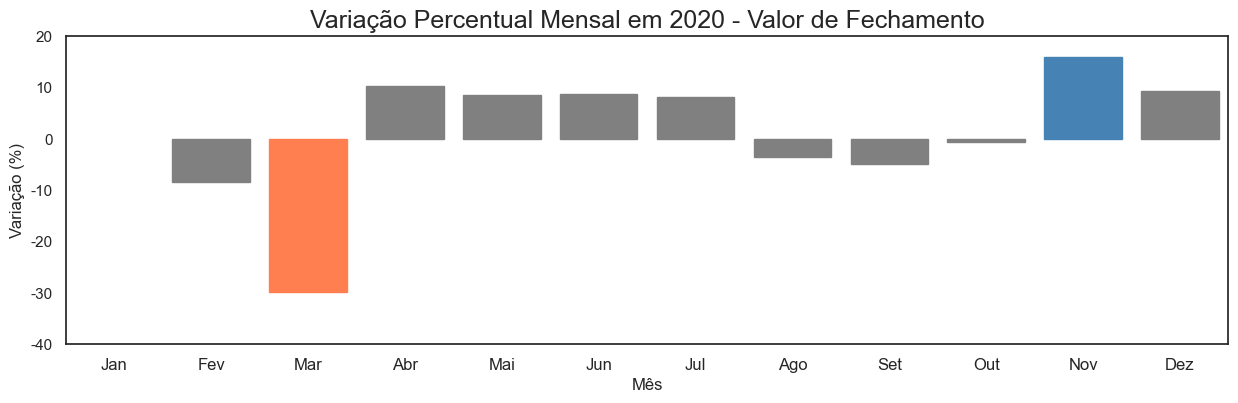

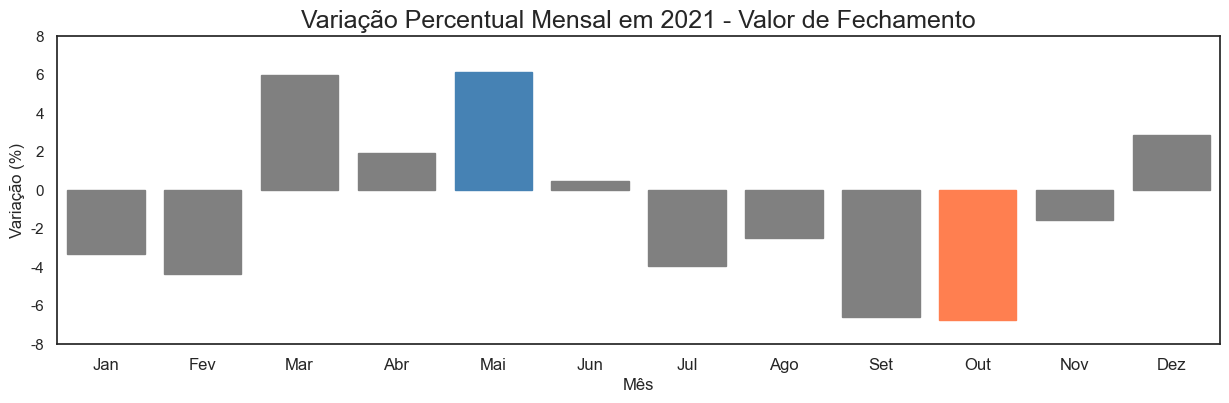

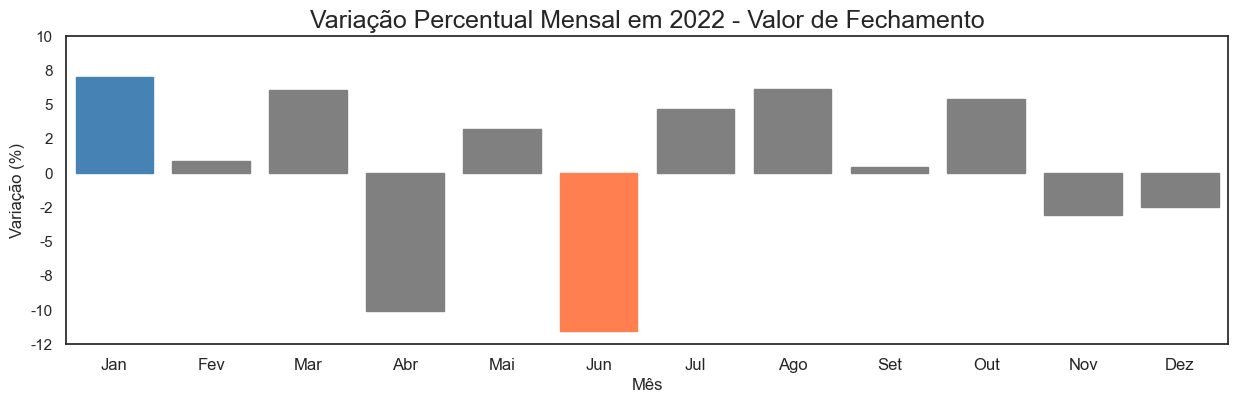

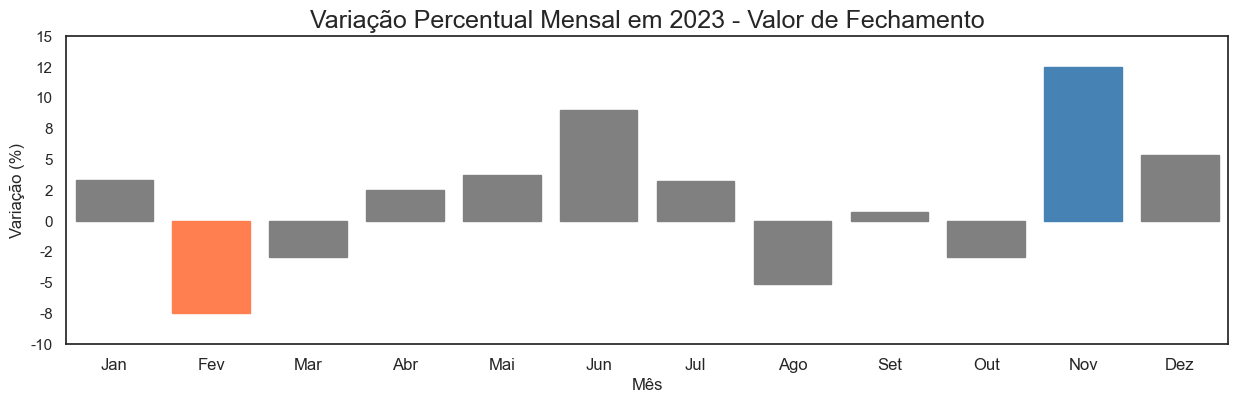

In [17]:
# Plot da variação mensal em cada ano
for ano in anos[:-1]:
    plt.figure(figsize=(15,4))
    df_mensal = dados_mensais[dados_mensais['Data_Base'].dt.year == ano]
    maior_variacao = df_mensal['Variação (%)'].max()
    menor_variacao = df_mensal['Variação (%)'].min()
    ax = sns.barplot(data=df_mensal, x='Data_Eixo', y='Variação (%)')
    for bar in ax.patches:
        if bar.get_height() == maior_variacao:
            bar.set_color('steelblue')    
        elif bar.get_height() == menor_variacao:
            bar.set_color('coral')
        else:
            bar.set_color('gray')

    xtick_loc = ax.get_xticks()
    xtick_labels = ax.get_xticklabels()

    ytick_loc = ax.get_yticks()
    ytick_labels = ax.get_yticklabels()

    ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, fontsize = 12)
    ax.set_yticks(ticks = ytick_loc, fontsize = 12)

    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

    ax.set_xlabel('Mês', fontsize = 12)
    ax.set_ylabel('Variação (%)', fontsize = 12)
    ax.set_title(f'Variação Percentual Mensal em {ano} - Valor de Fechamento', fontsize = 18, horizontalalignment = "center")

    plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Análise dos Gráficos de Variação Mensal:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li>O Ano de 2020 teve a maior amplitude com variação máxima de 15.90% e mínima de -29.90%. O mês que ocorreu a menor variação foi Março, e isso foi consequência da pandemia. O episódio ficou conhecido como "Corona Crash", onde algumas ações da bolsa caíram aproximandamente 70%. Empresas como companhias aéreas sentiram muito o peso da pandemia em suas ações, e inclusive em Março de 2020 a B3 paralisou as operações 4 vezes devido às quedas dos ativos.</li>
<li>Em geral, todos os anos apresentaram variações positivas e negativas. Outro ponto é que não há um mês específico que em todo ano ocorre uma variação positiva ou negativa, ou seja, não há um padrão tão bem definido.</li>
<li>Vale lembrar que para Janeiro de 2020 não é apresentado variação por não possuirmos em nossa base o mês de Dezembro de 2019.</li>

## Análise de Correlação

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Analisaremos a correlação entre o valor de fechamento e o Volume. Para as outras variáveis como valores máximos, mínimos e de abertura, a correlação deve ser grande uma vez que o valor de fechamento depende diretamente destas variáveis.

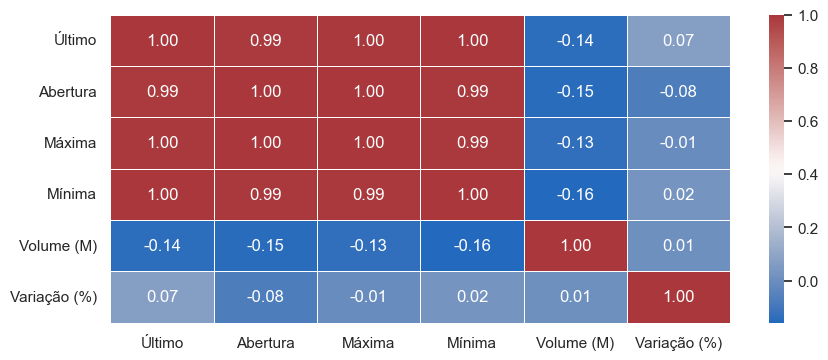

In [18]:
corr = dados.drop(columns=['Dia', 'Mês', 'Ano'], axis=1).corr()

plt.figure(figsize=(10, 4))

sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.5, cmap="vlag")

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Como esperado, o valor de fechamento possui uma enorme correlação com os valores máximos, mínimos e de abertura do índice Bovespa. Entretanto, o interessante é que a correlação com o Volume (M) é negativa, sugerindo que quanto mais o índice sobe, menos volume temos. Vale ressaltar que apesar de negativa, essa correlação não é tão forte, está mais perto de zero do que de -1.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Quando o índice sobe, significa que as ações das empresas que compõe o índice estão valorizando, o que é bom para as empresas e para quem possui suas ações, ou seja, é um bom momento para venda dos ativos. Quando o índice cai as ações perdem valor, o que só beneficía quem não as possui e agora pode comprá-las por um valor menor. Então essa correlação negativa pode estar indicando exatamente isso, o volume negociado é ligeiramente menor quando o índice sobe porque menos ações estão sendo compradas conforme os preços sobem, e quando o índice cai, o volume negociado pode ser maior por conta da maior procura das ações com preços menores.

# Análise de Séries Temporais

## O que é uma Série Temporal?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Uma série temporal é um conjunto de observações que ocorrem ao longo do tempo.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Dentro da análise das séries temporais, temos três principais componentes:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>Tendência: é a direção da série, ou seja, para onde o dado vai.</li>
<li>Sazonalidade: é a ocorrência de um padrão identificado dentro da série temporal.</li>
<li>Resíduo: é uma variação aleatória que não é possível de ser explicada por meio da tendência ou da sazonalidade, ou seja, os resíduos são a diferença entre a série original e o que foi explicado pela tendência e sazonalidade.</li>

## Como Funciona a Previsão da Série Temporal?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Os métodos de previsão para séries temporais buscam compreender os padrões e extrapolações dos dados passados para prever dados futuros caso esse comportamento se apresente novamente. Dessa forma, o modelo aprende a prever o futuro baseado no passado.

## Análise de Tendência, Sazonalidade e Ruído

### Usar Datas como Índice

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Para trabalharmos com séries temporais, nossos dados precisam estar previamente tratados e transformados de maneira que facilite a análise dos dados e criação do modelo, portanto usaremos a coluna de data como índice do DataFrame. 

In [19]:
dados_ts = dados[['Último', 'Data_Corrigida']].set_index('Data_Corrigida').sort_index()
dados_ts.head()

,Último
Data_Corrigida,
2020-01-02,118.573
2020-01-03,117.707
2020-01-06,116.878
2020-01-07,116.662
2020-01-08,116.247


### Visualização dos Valores de Fechamento

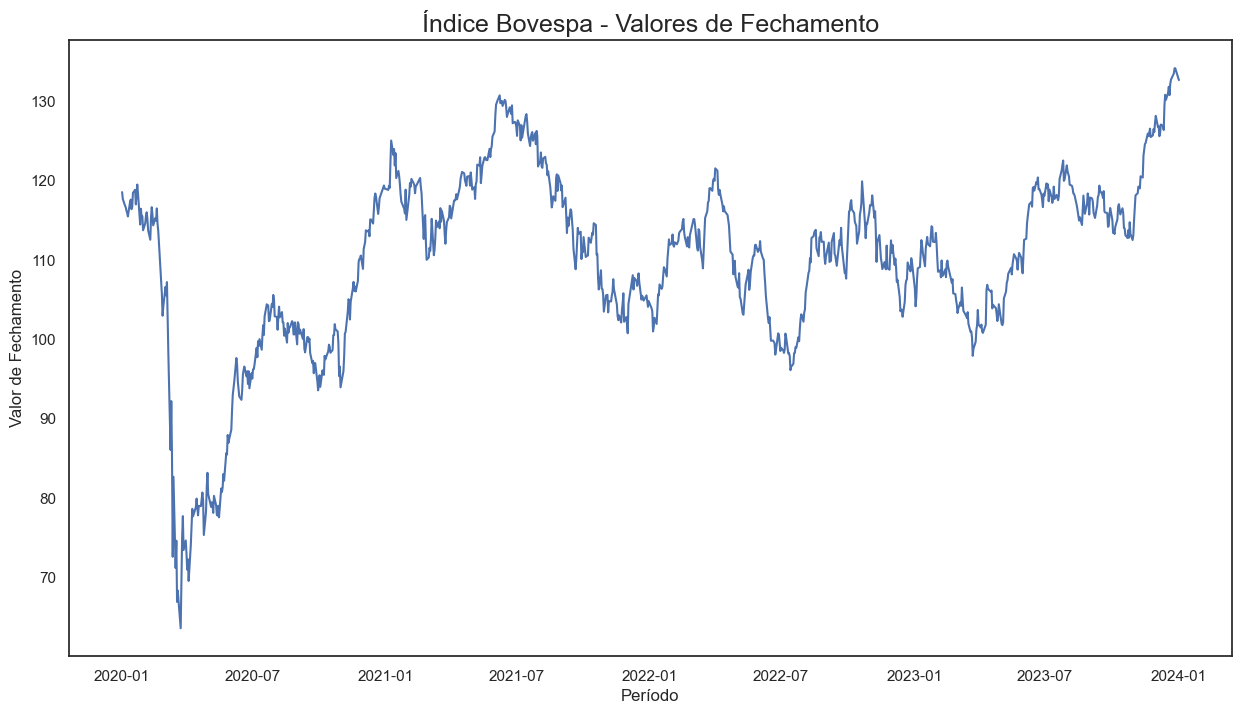

In [20]:
plt.figure(figsize = (15,8))

plt.plot(dados_ts.index, dados_ts.Último)
plt.title('Índice Bovespa - Valores de Fechamento', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valor de Fechamento', fontsize=12)

plt.show()

### Decomposição da Série Temporal

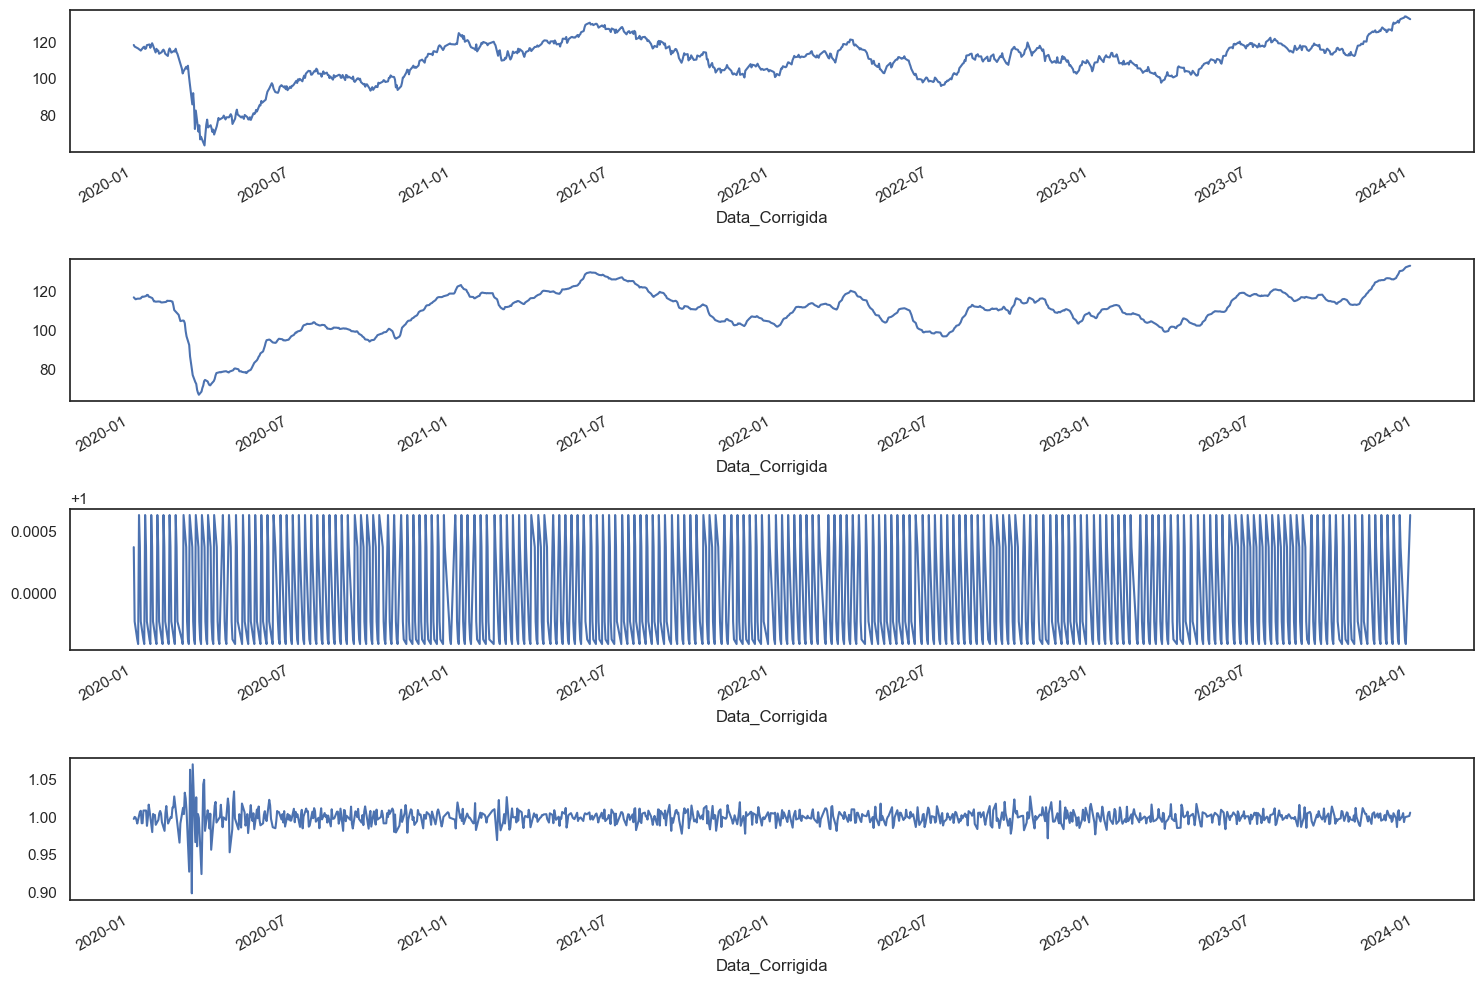

In [21]:
# Aplicação da Decomposição
resultados = seasonal_decompose(dados_ts, model='multiplicative', period=5) 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

# Plot da Série Original
resultados.observed.plot(ax=ax1)

# Plot da Tendência
resultados.trend.plot(ax=ax2)

# Plot da Sazonalidade
resultados.seasonal.plot(ax=ax3)

# Plot do Resíduo
resultados.resid.plot(ax=ax4)

plt.tight_layout()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Considerações:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>É possível verificar que a tendência da série se assemelha ao próprio desenho da série original, não indicando uma tendência em uma única direção.</li>
<li>A sazonalidade é bem complicada de ser observada uma vez que estamos trabalhando com índices econômicos que possuem variação diária, portanto identificar um padrão repetitivo se torna complicado.</li>
<li>Quando olhamos para os resíduos, reparamos que existe um ruído muito expressivo no início da série, e sabemos que o motivo é o mês de março de 2020 onde o valor de fechamento do índice Bovespa sofreu uma tremenda queda devido a pandemia.</li>

# Construção do Modelo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora partiremos para a construção dos modelos. Neste estudo testaremos 5 modelos diferentes e avaliaremos qual deles se enquadra melhor em nossa necessidade. Os modelos que testaremos serão:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>Modelo da Média Móvel</li>
<li>Modelo ARIMA</li>
<li>Modelo Naive</li>
<li>Modelo Seasonal Naive</li>
<li>Modelo com Prophet</li> 

## Análise Inicial da Estacionaridade

### O que é Estacionaridade

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Alguns algoritmos que trabalham com previsões de séries temporais partem da premissa de que a série é estacionária. Isso significa que alguns períodos da série possuem a mesma média, ou seja, quando olhamos a estacionaridade, não importa a tendência ou a sazonalidade, a média continua a mesma. Entretando, séries estacionárias não performam bem com previsões de longo prazo.

### Teste de Dickey-Fuller

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Um dos testes mais utilizados para verificar a estacionaridade de uma série temporal é o teste de Dickey-Fuller Aumentado ou ADF. Esse teste parte das seguintes hipóteses:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>Hipótese Nula (H0): Diz que a série não é estacionária.</li>
<li>Hipótese Alternativa (H1): Diz que a série é estacionária.</li>

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    A partir do resultado do "valor p" temos que, quando o "valor p" for menor que um determinado nível de significância nós rejeitamos a hipótese nula, sugerindo que a série temporal é estacionária.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Vamos realizar um teste inicial apenas para comprovar uma das hipóteses. Ao julgar pelo gráfico da decomposição, nossa série não parece ser estacionária. 

In [22]:
adf = dados_ts['Último'].values

# Instanciando o Teste de Dickey-Fuller Aumentado
result = adfuller(adf)

print('-----------Teste ADF Inicial-----------')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Valor: {result[1]}')
print(f'Valores Críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

-----------Teste ADF Inicial-----------
Teste Estatístico: -2.3868648211292904
P-Valor: 0.14547808728423872
Valores Críticos:
	1%: -3.4369994990319355
	5%: -2.8644757356011743
	10%: -2.5683331327427803


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Considerando um intervalo de significância de 0.05 (5%), como o valor p está acima deste intervalo, podemos afirmar inicialmente que nossa série não é estacionária.

## Modelo da Média Móvel

### Como Funciona o Modelo da Média Móvel?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O modelo da média móvel utiliza a média de um número de dias observados para prever o próximo dia.

### Testando o Modelo com Janelas de 15 e 30 dias.

In [23]:
dados_ts_media_movel = dados_ts.copy()
dados_ts_media_movel['Último_Media_Movel_15d'] = dados_ts_media_movel['Último'].rolling(15).mean().shift()
dados_ts_media_movel['Último_Media_Movel_30d'] = dados_ts_media_movel['Último'].rolling(30).mean().shift()
dados_ts_media_movel

,Último,Último_Media_Movel_15d,Último_Media_Movel_30d
Data_Corrigida,,,
2020-01-02,118.573,NaN,NaN
2020-01-03,117.707,NaN,NaN
2020-01-06,116.878,NaN,NaN
2020-01-07,116.662,NaN,NaN
2020-01-08,116.247,NaN,NaN
...,...,...,...
2023-12-22,132.753,128.690800,126.614300
2023-12-26,133.533,128.995333,127.071600
2023-12-27,134.194,129.444000,127.503767


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Plotaremos o mesmo gráfico da série original só que adicionando as duas séries deslocadas 15 e 30 dias para frente.

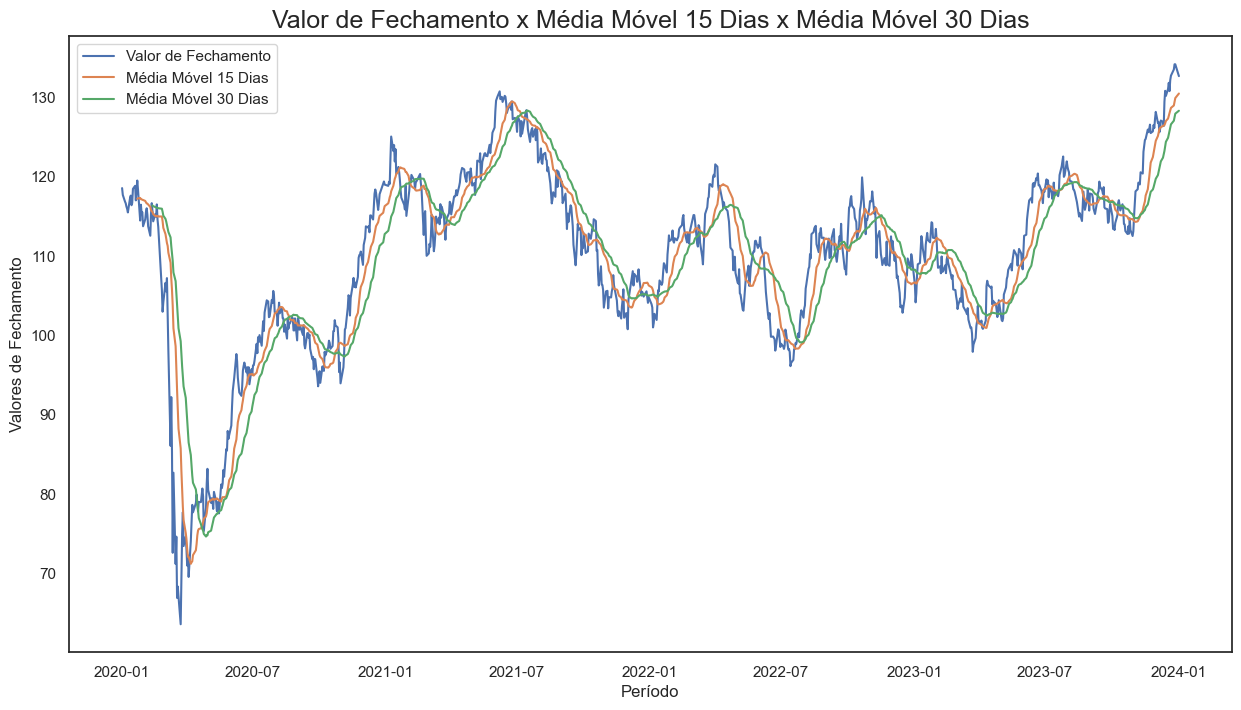

In [24]:
plt.figure(figsize=(15,8))

plt.plot(dados_ts_media_movel['Último'], label='Valor de Fechamento')
plt.plot(dados_ts_media_movel['Último_Media_Movel_15d'], label='Média Móvel 15 Dias')
plt.plot(dados_ts_media_movel['Último_Media_Movel_30d'], label='Média Móvel 30 Dias')

plt.title('Valor de Fechamento x Média Móvel 15 Dias x Média Móvel 30 Dias', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores de Fechamento', fontsize=12)

plt.legend(loc=2)

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Aparentemente o modelo da média móvel tanto para o deslocamento de 15 dias e de 30 dias, se assemelham à série original. Entretando não podemos afirmar que isso significa uma boa performance do modelo. O gráfico possui um período muito longo de dados plotados e a escala não nos permite ver com nitidez o comportamento das três curvas. Portanto, plotaremos um período menor (apenas 2023) como se fosse um recorte do gráfico para verificar realmente qual o comportamento das Três curvas.

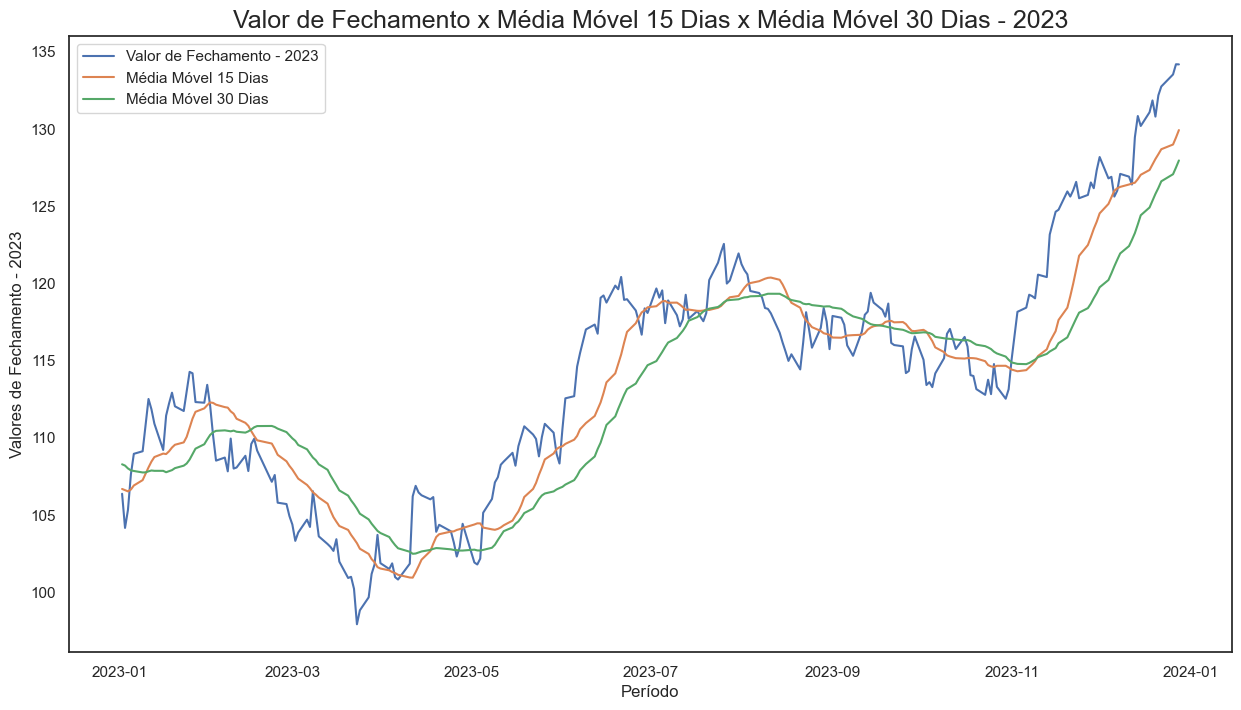

In [25]:
# Gerando dados apenas de 2023 para analisar
dados_ts_2023 = dados_ts_media_movel.loc['2023-01-02':'2023-12-28']

plt.figure(figsize=(15,8))

plt.plot(dados_ts_2023['Último'], label='Valor de Fechamento - 2023')
plt.plot(dados_ts_2023['Último_Media_Movel_15d'], label='Média Móvel 15 Dias')
plt.plot(dados_ts_2023['Último_Media_Movel_30d'], label='Média Móvel 30 Dias')

plt.title('Valor de Fechamento x Média Móvel 15 Dias x Média Móvel 30 Dias - 2023', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores de Fechamento - 2023', fontsize=12)

plt.legend(loc=2)

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Podemos observar que o movimento das curvas é similar, porém os valores de cada curva estão distantes entre si, o que sugere que esse modelo não performa bem.

## Modelo ARIMA

### Como Funciona o Modelo ARIMA?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O modelo ARIMA tem como premissa o uso da média móvel integrada auto-regressiva para descrever a autocorrelação nos dados. A parte auto-regressora irá olhar para o passado e achar a correlação futura, a parte integrada representa quantas vezes a série original foi diferenciada, e a média móvel deve estar próxima de um valor constante. Para utilizar o modelo ARIMA a série temporal necessariamente deve ser estacionária.

### Quais são os Hiperparâmetros do Modelo ARIMA?

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>  
<li>P - Número de lags que devem ser incluídos no modelo.</li>
<li>D - Número de vezes que as observações serão diferenciadas.</li>
<li>Q - Ordem de média móvel, tamanho de uma janela (lag) de média móvel.</li>
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O número de lags (P) são os valores auto correlacionados que serão usados para prever os valores futuros. A diferenciação (D) é utilizada para deixar a série estacionária. E, a ordem da média móvel (Q) é utilizada para calcular o erro.

### Transformando a Série Original em Estacionária

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Verificamos anteriormente por meio do teste ADF que nossa série original não é estacionária. Portanto, para utilizarmos o ARIMA devemos transformar a série original em uma série estacionária. Para isso começaremos analisando a média móvel.

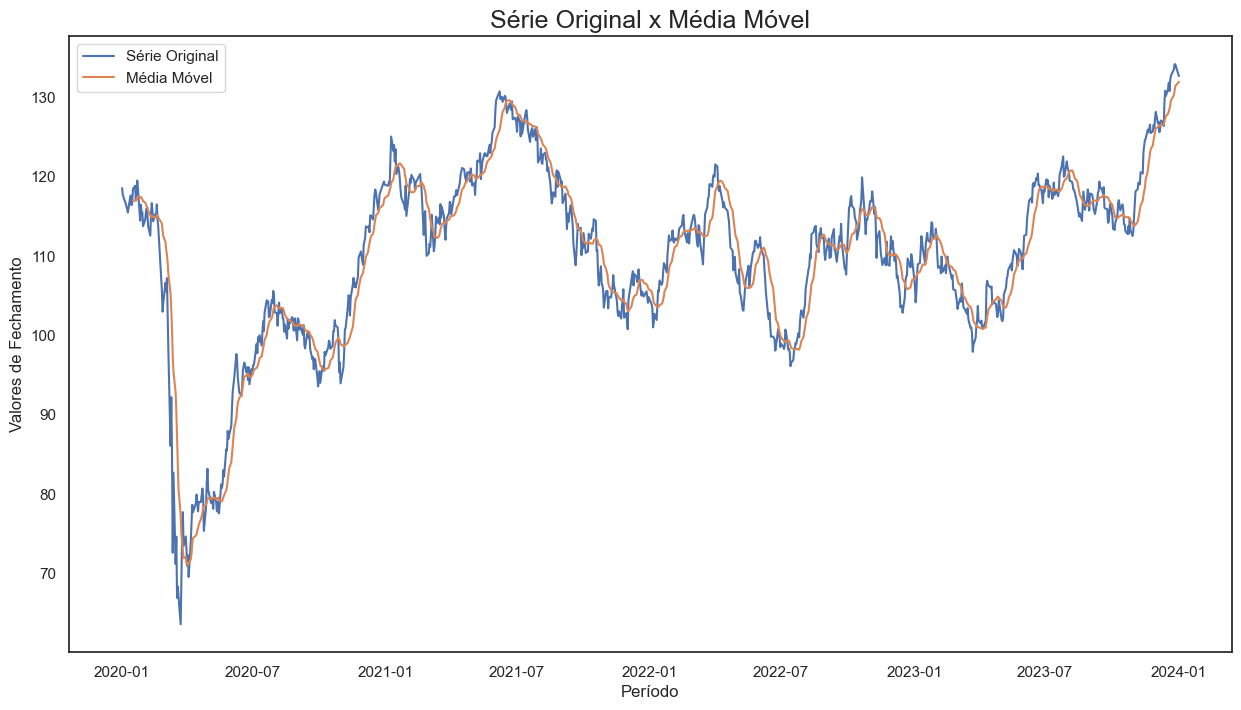

In [26]:
# Análise da Média Móvel

media_movel = dados_ts.rolling(12).mean()

plt.figure(figsize=(15,8))

serie_original = plt.plot(dados_ts, label='Série Original')
media_movel = plt.plot(media_movel, label='Média Móvel')

plt.title('Série Original x Média Móvel', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores de Fechamento', fontsize=12)

plt.legend(loc='best')

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    É possível observar que a média móvel possui sua própria tendência, e para eliminar essa tendência, podemos aplicar a escala logarítmica.

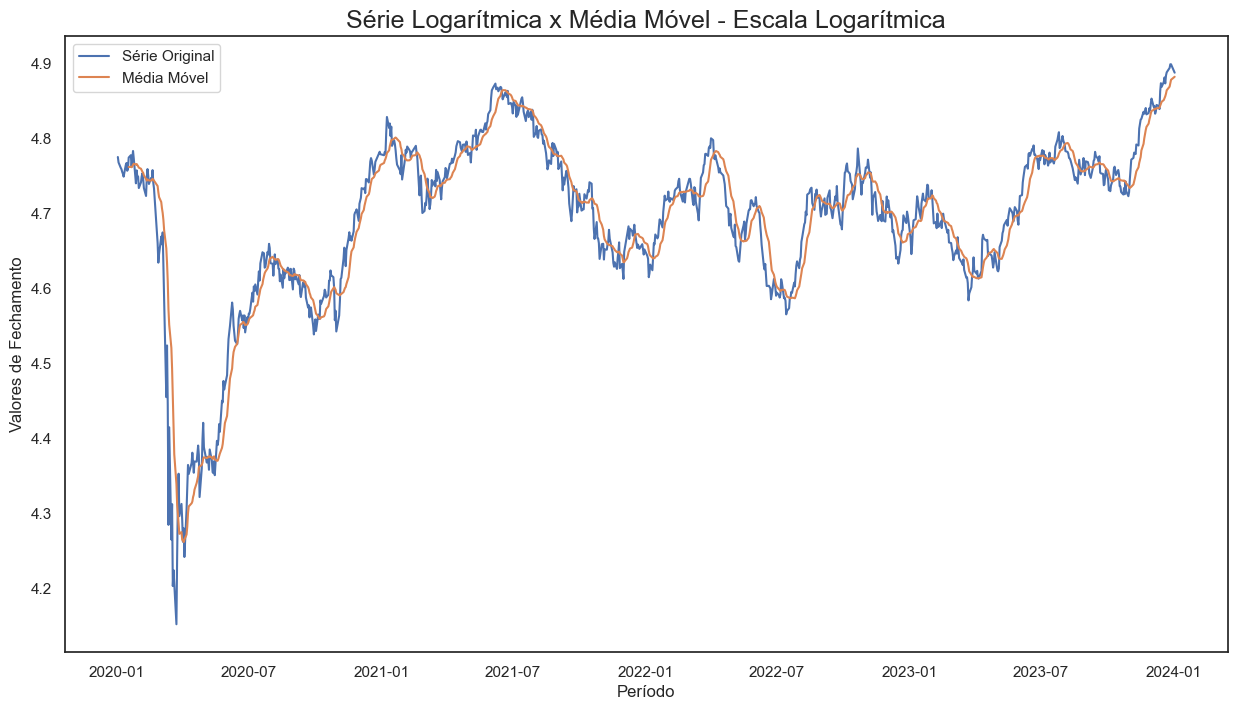

In [27]:
# Aplicação do Log

dados_ts_log = np.log(dados_ts)

ma_log = dados_ts_log.rolling(12).mean()

plt.figure(figsize=(15,8))

serie_original_log = plt.plot(dados_ts_log, label='Série Original')
media_movel_log = plt.plot(ma_log, label='Média Móvel')

plt.title('Série Logarítmica x Média Móvel - Escala Logarítmica', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores de Fechamento', fontsize=12)

plt.legend(loc='best')

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Aparentemente não houve mudança nenhuma, porém ao olharmos para o eixo Y, vemos que a escala dos valores mudaram. Agora removendo a média móvel devemos chegar perto de um padrão estacionário.

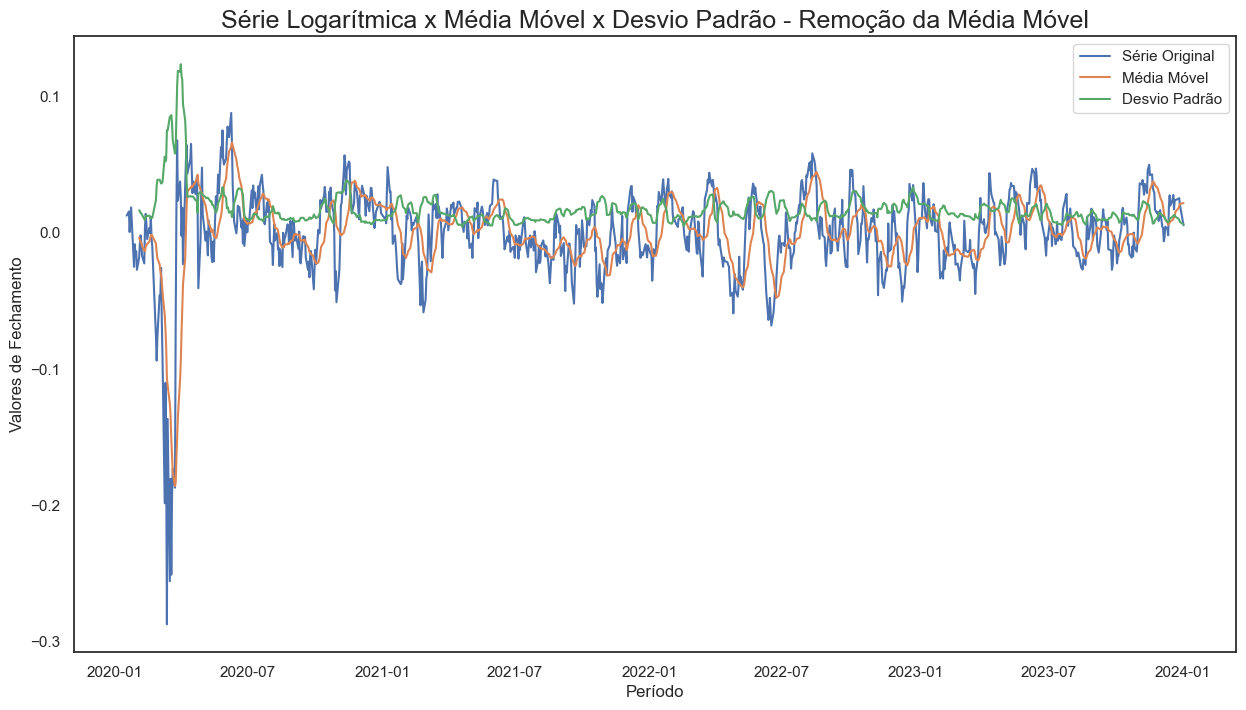

In [28]:
# Remoção da Média Móvel

dados_ts_s = (dados_ts_log - ma_log).dropna() # tiramos os nulos para poder subtrair sem problemas

ma_s = dados_ts_s.rolling(12).mean()

std_s = dados_ts_s.rolling(12).std()

plt.figure(figsize=(15,8))

serie_original_s = plt.plot(dados_ts_s, label='Série Original')
media_movel_s = plt.plot(ma_s, label='Média Móvel')
desvio_padrao_s = plt.plot(std_s, label='Desvio Padrão')

plt.title('Série Logarítmica x Média Móvel x Desvio Padrão - Remoção da Média Móvel', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores de Fechamento', fontsize=12)

plt.legend(loc='best')

plt.show()

In [29]:
# Reaplicando o Teste de Dickey-Fuller (ADF)

adf_s = dados_ts_s['Último'].values

result = adfuller(adf_s)

print('-----------Teste ADF Após Tratamento-----------')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Valor: {result[1]}')
print(f'Valores Críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

-----------Teste ADF Após Tratamento-----------
Teste Estatístico: -7.67794180693974
P-Valor: 1.5309586384714255e-11
Valores Críticos:
	1%: -3.4370678095881804
	5%: -2.8645058608075264
	10%: -2.568349178354273


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Este valor p menor que 5% já nos garante que a hipótese alternativa (H1) de que a séria é estacionária é aceitável. Entretanto, podemos testar outras técnicas para ser se conseguimos melhorar essa estacionaridade uma vez que, como podemos ver, no começo a série ainda existe uma enorme variação por conta do mês de Março de 2020, que nós já vimos ser o mesmo de maior variação do índice Bovespa devido a pandemia.

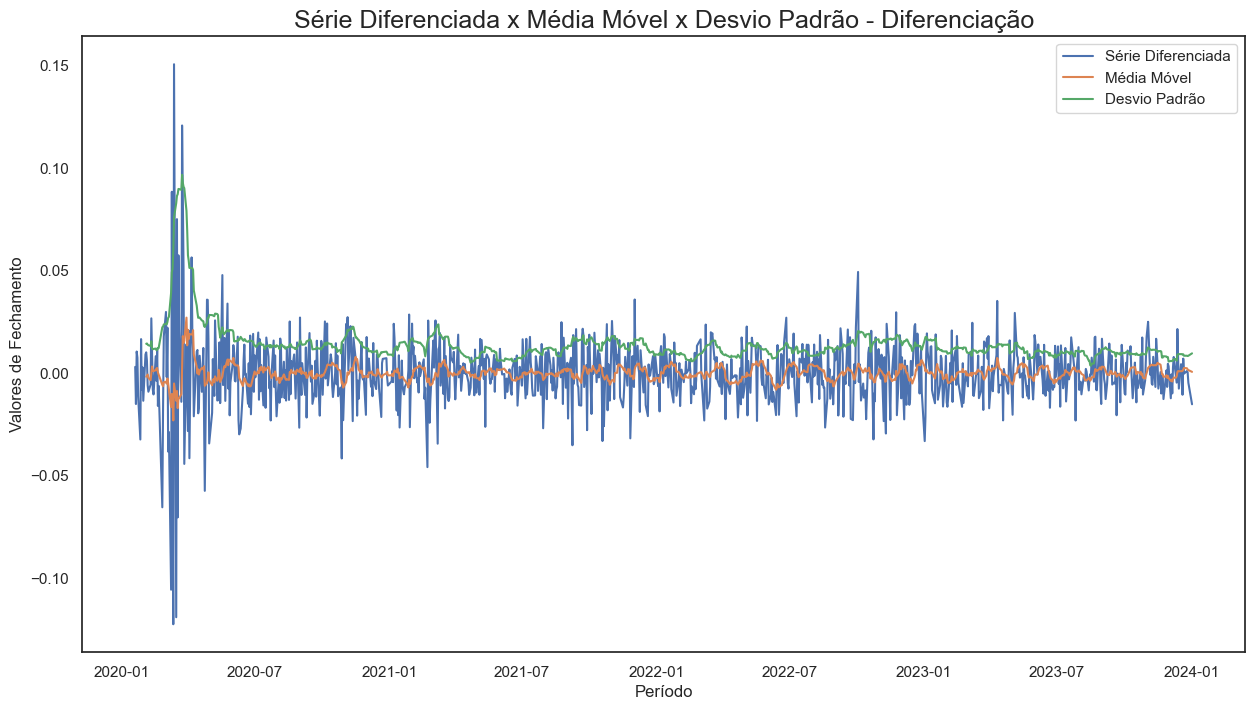

In [30]:
# Análise por Diferenciação

dados_ts_diff = dados_ts_s.diff().dropna() # diferença entre o valor anterior e o atual

ma_diff = dados_ts_diff.rolling(12).mean()

std_diff = dados_ts_diff.rolling(12).std()

plt.figure(figsize=(15,8))

serie_original_s = plt.plot(dados_ts_diff, label='Série Diferenciada')
media_movel_s = plt.plot(ma_diff, label='Média Móvel')
desvio_padrao_s = plt.plot(std_diff, label='Desvio Padrão')

plt.title('Série Diferenciada x Média Móvel x Desvio Padrão - Diferenciação', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores de Fechamento', fontsize=12)

plt.legend(loc='best')

plt.show()

In [31]:
# Aplicando o teste ADF para a diferenciação

adf_diff = dados_ts_diff['Último'].values

result = adfuller(adf_diff)

print('-----------Teste ADF Diferenciação-----------')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Valor: {result[1]}')
print(f'Valores Críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

-----------Teste ADF Diferenciação-----------
Teste Estatístico: -10.278877038616372
P-Valor: 3.826017670469258e-18
Valores Críticos:
	1%: -3.4371658366910216
	5%: -2.8645490899304784
	10%: -2.5683722036989813


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Conseguimos diminuir mais ainda o valor p, o que indica que estamos mais perto de um intervalo de confiança de 100% para dizer que a série agora é estacionária.

### Analisando o ACF e PACF

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Para desenvolver o modelo precisamos analisar a Autocorrelação (ACF), que correlaciona em apenas uma variável, ou seja, em uma mesma linha do tempo ela observa a correlação direta e/ou indireta entre dois pontos. E a Autocorrelação Parcial (PACF), que só lida com a correlação direta entre dois pontos.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Agora trabalharemos com os limites críticos calculados anteriormente.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Utilizaremos a equação 1.96 / sqrt(N - d), onde N = número de pontos do dataframe e d = número de vezes que diferenciamos o dataframe. Em nosso caso nós diferenciamos o dataframe apenas uma vez.

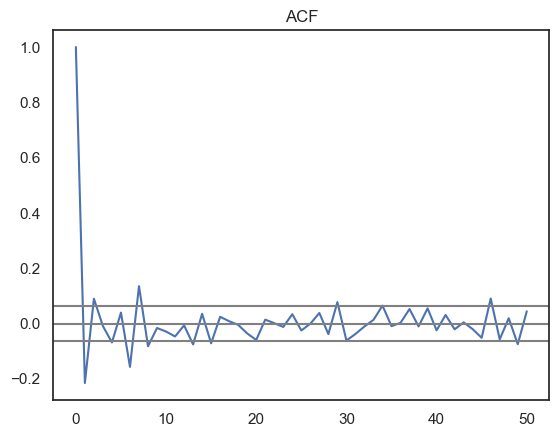

In [32]:
lag_acf = acf(dados_ts_diff.dropna(), nlags=50) # nlags = janela de tempo, geralmente em dias

plt.plot(lag_acf)

# limite inferior
plt.axhline(y = -1.96 / np.sqrt(len(dados_ts_diff) - 1), linestyle='-', color='gray')

# linha de centro
plt.axhline(y = 0, linestyle='-', color='gray')

# limite superior
plt.axhline(y = 1.96 / np.sqrt(len(dados_ts_diff) - 1), linestyle='-', color='gray')

plt.title('ACF')
plt.show()

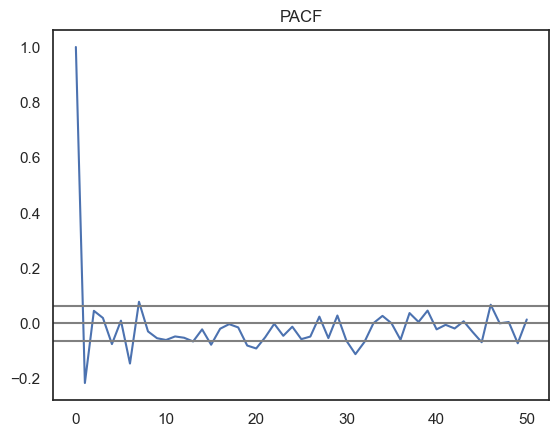

In [33]:
lag_pacf = pacf(dados_ts_diff.dropna(), nlags=50) # nlags = janela de tempo, geralmente em dias

plt.plot(lag_pacf)
            
# limite inferior
plt.axhline(y = -1.96 / np.sqrt(len(dados_ts_diff) - 1), linestyle='-', color='gray')

# linha de centro
plt.axhline(y = 0, linestyle='-', color='gray')

# limite superior
plt.axhline(y = 1.96 / np.sqrt(len(dados_ts_diff) - 1), linestyle='-', color='gray')

plt.title('PACF')
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Basicamente, se fossemos construir o ARIMA, já conseguiríamos estipular x, y e z olhando muito para o ACF, porque na séries estacionária, a autocorrelação é muito bem definida, porém a parcial flutua muito. Podemos ver que, em ambos os gráficos, a reta toca a linha de centro pela primeira vez em x = 1 aproximadamente, portanto P = Q = 1.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Existe outra forma de plotar os gráficos de ACF e PACF por meio do statsmodels. Vamos explorar essa opção.

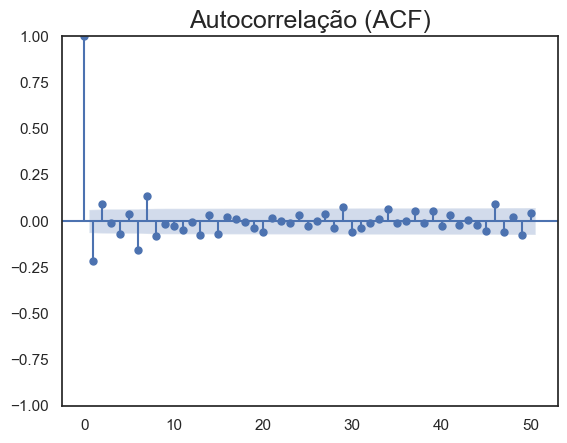

In [34]:
sm.graphics.tsa.plot_acf(dados_ts_diff, lags=50)

plt.title('Autocorrelação (ACF)', fontsize=18)

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    No ACF, as observações fora da área que representa o intervalo de confiança, são consideradas correlacionadas estatísticamente. Portanto, para uma janela de tempo de 50 dias, todos as observações se correlacionam estatísticamente.

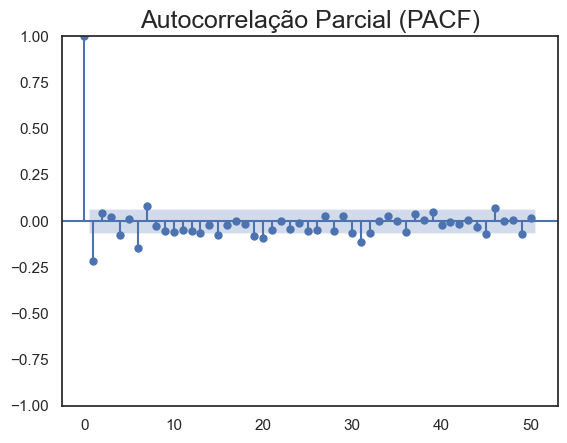

In [35]:
sm.graphics.tsa.plot_pacf(dados_ts_diff, lags=50)

plt.title('Autocorrelação Parcial (PACF)', fontsize=18)

plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Para o PACF, a análise geralmente está relacionada com a identificação do atraso específico que contribui para a autocorrelação em um determinado ponto, que em nosso caso, foi um lag.

### Aplicação do Modelo ARIMA

MAPE: 463.08%


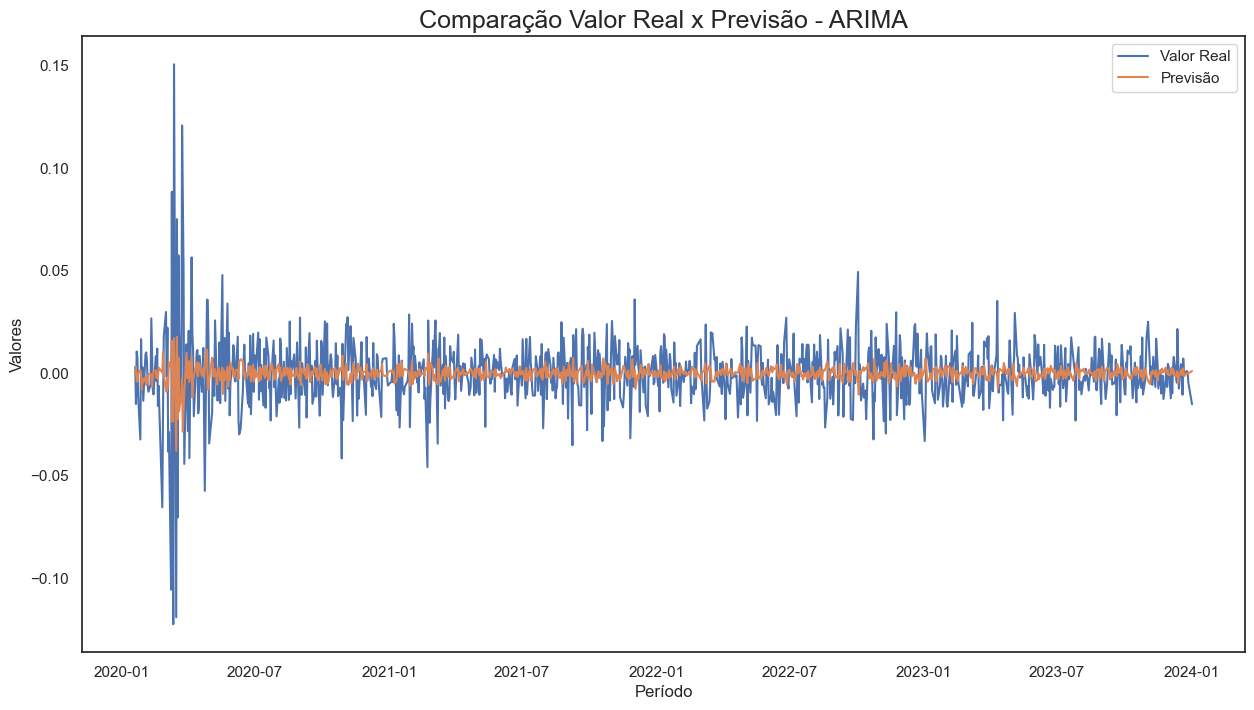

In [36]:
# Instanciando o Modelo
arima = ARIMA(dados_ts_diff, order=(1,1,1))

# Fit e Predict do Modelo
resultados = arima.fit()
previsao = resultados.predict()

# Cálculo do MAPE
previsao.index = dados_ts_diff.index # Ajuste do índice
valores_previstos = dados_ts_log['Último'].iloc[0] + np.cumsum(previsao) # Invertendo a diferenciação
mape = mean_absolute_error(dados_ts_diff['Último'], valores_previstos) * 100
print(f"MAPE: {mape:.2f}%")

# Plot Comparando Valor Real e Previsão
plt.figure(figsize=(15,8))
plt.plot(dados_ts_diff)
plt.plot(previsao)
plt.legend(labels=['Valor Real','Previsão'], loc='best')
plt.title('Comparação Valor Real x Previsão - ARIMA', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O MAPE (Mean Absolute Percentage Error) é o percentual do erro médio absoluto. É uma métrica muito utilizada para avaliar modelos de séries temporais como o ARIMA. Quanto mais perto de zero, melhor é o modelo. E em nosso caso, o modelo não performou bem, pelo gráfico podemos ver o quão distante as previsões estão dos valores reais e o MAPE só confirma isso.

## Modelo Naive

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O modelo Naive funciona como uma linha de base (baseline) para termos um valor inicial da performance do modelo, ou seja, o modelo Naive seria um ponto de partida, e qualquer outro modelo testado deverá performar melhor que o Naive. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
    Para aplicar o Naive, usaremos o StatsForecast, e uma forma de tentarmos melhorar o modelo é extraindo um período menor da série temporal para treino e um período para validação. Entretanto, para usar o StatsForecast precisamos alterar os nomes das colunas de acordo com o que a biblioteca interpreta.

### Preparação da Base

In [37]:
dados_ts_fc = dados_ts_diff.reset_index().rename(columns={'Data_Corrigida': 'ds', 'Último': 'y'})
dados_ts_fc['unique_id'] = 1.0
dados_ts_fc.head()

,ds,y,unique_id
0,2020-01-20,0.003033,1.0
1,2020-01-21,-0.015083,1.0
2,2020-01-22,0.010525,1.0
3,2020-01-23,0.007535,1.0
4,2020-01-24,-0.011197,1.0


### Separação de Treino e Validação

In [38]:
treino = dados_ts_fc[(dados_ts_fc['ds'] >= '2022-09-01') & (dados_ts_fc['ds'] < '2023-09-01')]
treino.head()

,ds,y,unique_id
652,2022-09-01,0.010334,1.0
653,2022-09-02,0.006260,1.0
654,2022-09-05,0.013193,1.0
655,2022-09-06,-0.020672,1.0
656,2022-09-08,0.001826,1.0


In [39]:
validacao = dados_ts_fc[(dados_ts_fc['ds'] >= '2023-09-01') & (dados_ts_fc['ds'] < '2023-12-02')]
validacao.head()

,ds,y,unique_id
902,2023-09-01,0.016771,1.0
903,2023-09-04,-0.002986,1.0
904,2023-09-05,-0.005170,1.0
905,2023-09-06,-0.012664,1.0
906,2023-09-08,-0.005204,1.0


In [40]:
h = validacao['ds'].nunique()
h

62

### Aplicação do Modelo Naive - Baseline

Valor do MAPE: 157.19%


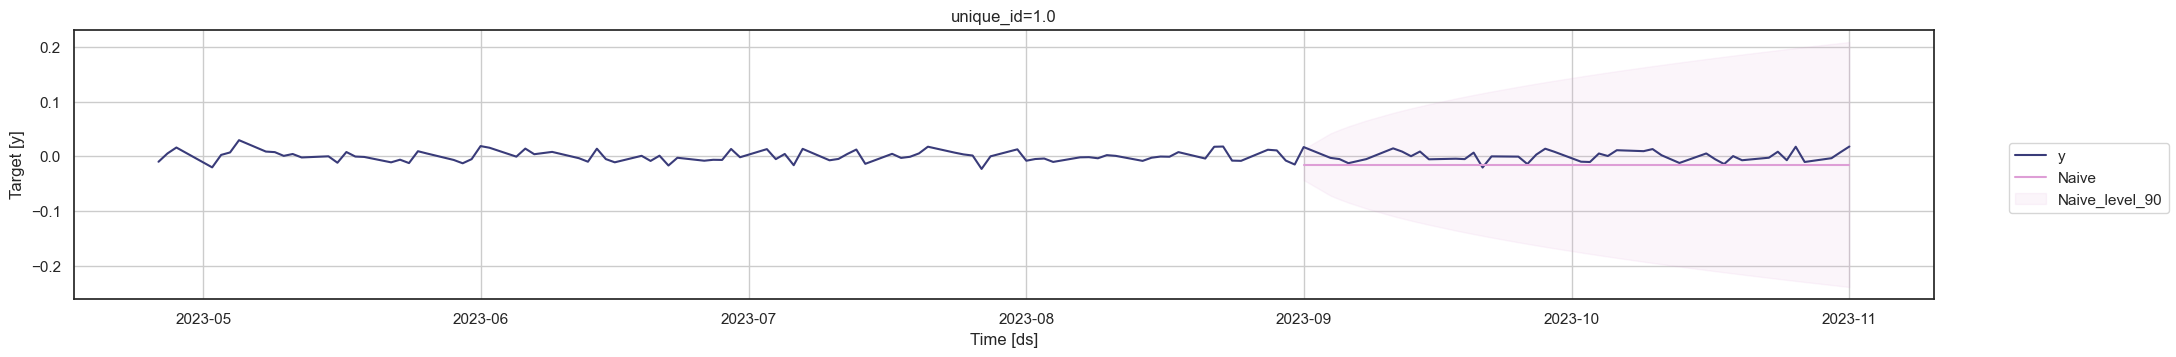

In [41]:
# Instanciando o Modelo
naive = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
# freq é a frequencia da base, no caso, D de diária
# o n_jobs -1 é padrão para usar todas as CPUs disponíveis no PC

#Treinando e Realizando o Predict do modelo
naive.fit(treino)
previsao_naive = naive.predict(h=h, level=[90])
# h é o horizonte
# level é o nível de confiança em %

# Construindo o DataFrame com as Previsões
df_previsao_naive = previsao_naive.reset_index().merge(validacao, on=['ds', 'unique_id'], how='left').dropna()

# Cálculo do MAPE
mape_naive = mean_absolute_error(df_previsao_naive['y'].values, df_previsao_naive['Naive'].values) * 100
print(f"Valor do MAPE: {mape_naive:.2%}")

# Plot 
naive.plot(treino, 
           df_previsao_naive, 
           level=[90], 
           unique_ids=[1.0], 
           engine='matplotlib', 
           max_insample_length=90)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O MAPE continua altíssimo, indicando uma péssima performance. Apesar de estar melhor que o ARIMA, devemos lembrar que para o Naive só estamos olhando um ano de dados e prevendo três meses. No ARIMA olhamos a base toda de uma vez.

## Modelo Seasonal Naive

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    O modelo Seasonal Naive funciona da mesma forma que o modelo Naive, porém agora inseriremos como objeto de ana'lise a sazonalidade encontrada no período escolhido de estudo.

Valor do MAPE: 140.81%


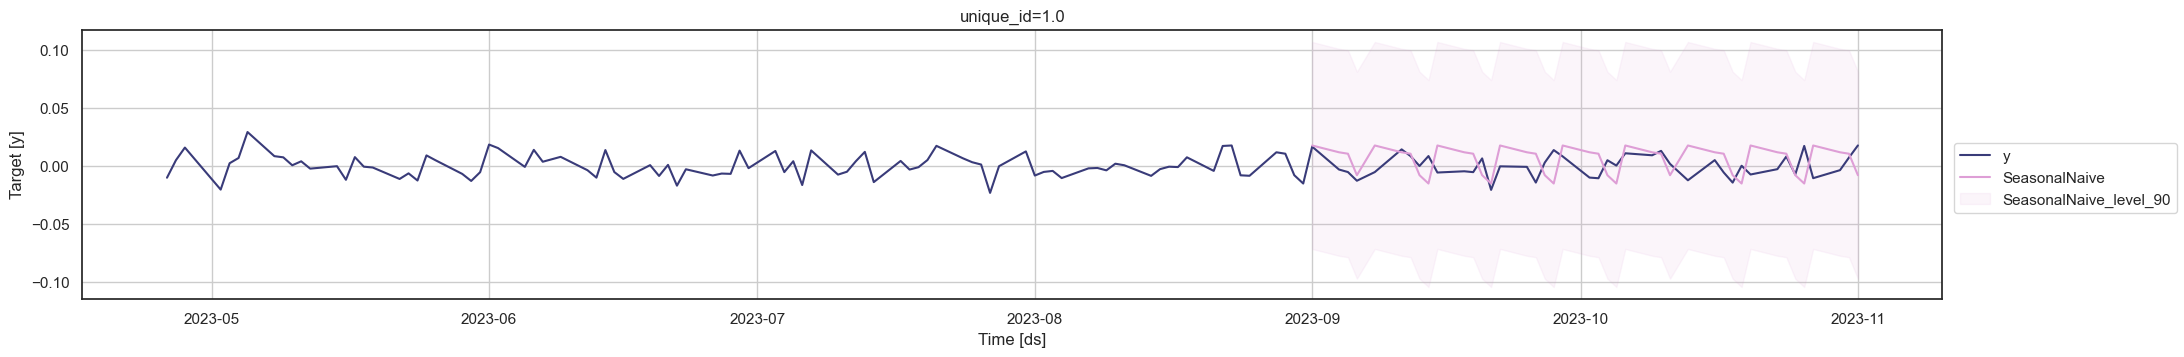

In [42]:
# Instanciando o Modelo
naive_seas = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
# season_lenght é o comprimento da janela sazonal que podemos escolher

#Treinando e Realizando o Predict do modelo
naive_seas.fit(treino)
previsao_naive_seas = naive_seas.predict(h=h, level=[90])

# Construindo o DataFrame com as Previsões
df_previsao_naive_seas = previsao_naive_seas.reset_index().merge(validacao, on=['ds', 'unique_id'], how='left').dropna()

# Cálculo do MAPE
mape_naive_seas = mean_absolute_error(df_previsao_naive_seas['y'].values, df_previsao_naive_seas['SeasonalNaive'].values) * 100
print(f"Valor do MAPE: {mape_naive_seas:.2%}")

# Plot
naive_seas.plot(treino, 
           df_previsao_naive_seas, 
           level=[90], 
           unique_ids=[1.0], 
           engine='matplotlib', 
           max_insample_length=90)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    A adição da sazonalidade diminuiu o MAPE, porém essa queda não é significativa e o modelo ainda não performa bem.

## Modelo com Prophet

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
     O Prophet, desenvolvida pelo Facebook (Atual Meta), é uma ferramenta especialmente projetada para lidar com séries temporais que possuem padrões sazonais fortes. O Prophet possui a capacidade de lidar com dados faltantes, tendências que mudam ao longo do tempo, inclusive quando tratamos dias não úteis.

### Preparação da Base

In [43]:
dados_prophet = dados_ts.reset_index()
dados_prophet[['ds','y']] = dados_prophet[['Data_Corrigida', 'Último']]
dados_prophet.head()

,Data_Corrigida,Último,ds,y
0,2020-01-02,118.573,2020-01-02,118.573
1,2020-01-03,117.707,2020-01-03,117.707
2,2020-01-06,116.878,2020-01-06,116.878
3,2020-01-07,116.662,2020-01-07,116.662
4,2020-01-08,116.247,2020-01-08,116.247


### Separação de Teste e Treino

In [44]:
treino = dados_prophet.sample(frac=0.8, random_state=0)
teste = dados_prophet.drop(treino.index)
print(f'training data size : {treino.shape}')
print(f'testing data size : {teste.shape}')

training data size : (796, 4)
testing data size : (199, 4)


### Aplicação do Modelo com Prophet

19:57:10 - cmdstanpy - INFO - Chain [1] start processing
19:57:10 - cmdstanpy - INFO - Chain [1] done processing


MAPE: 3.42%


<Figure size 1500x800 with 0 Axes>

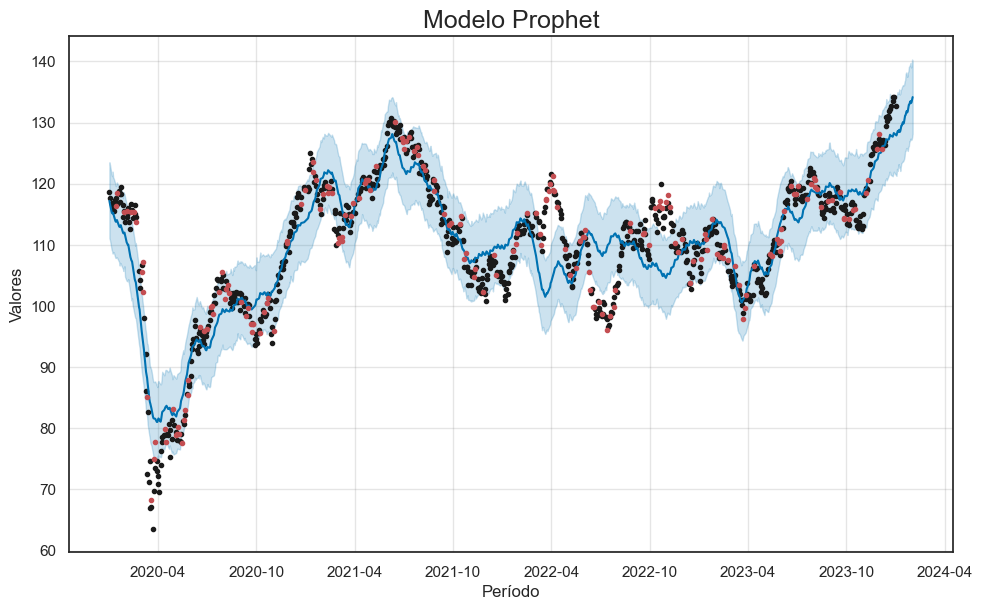

In [45]:
# Instanciando o Modelo
prophet = Prophet(daily_seasonality=True)

#Treinando e Realizando o Predict do modelo
prophet.fit(treino)
df_previsao_prophet = prophet.make_future_dataframe(periods=30, freq='D')
previsao_prophet = prophet.predict(df_previsao_prophet)

# Criando DataFrame com as previsoes
previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']
previsao = previsao_prophet[previsao_cols]
valores_reais = treino[valores_reais_cols]
resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

# Calcular o erro percentual absoluto para cada ponto de dados
resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100

# Cálculo do MAPE
mape = np.mean(resultados['erro_percentual_absoluto'])
print(f"MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(15,8))
prophet.plot(previsao_prophet);
plt.plot(teste['ds'], teste['y'], '.r')
plt.title('Modelo Prophet', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
     O Prophet, dentre todos os modelos, foi o que performou melhor. Como é uma ferramenta robusta, esperasse que performe bem acima de ferramentas mais simples.

### Análise dos Feriados com Prophet

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
     Com o Prophet podemos incluir em nossa análise a ação de feriados.

19:57:11 - cmdstanpy - INFO - Chain [1] start processing
19:57:11 - cmdstanpy - INFO - Chain [1] done processing


MAPE: 3.42%


<Figure size 1500x800 with 0 Axes>

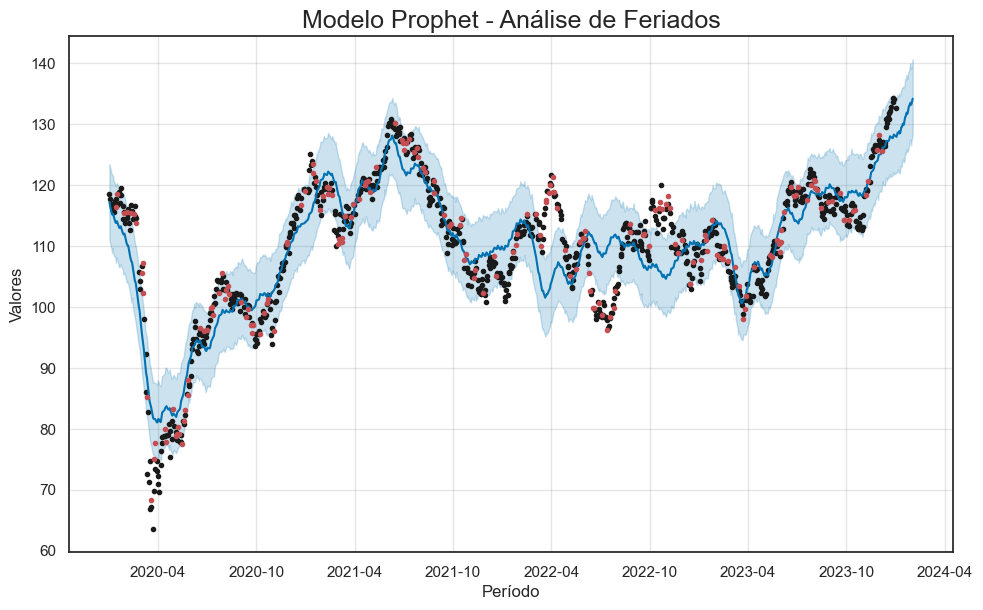

In [46]:
# Criando um modelo de exemplo abaixo
prophet_hol = Prophet(seasonality_mode='additive', daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)

# Adicionando os feriados
prophet_hol.add_country_holidays(country_name='BR') # Brasil

# Treinando o modelo
prophet_hol.fit(treino)
df_previsao_prophet_hol = prophet.make_future_dataframe(periods=30, freq='D')
previsao_prophet_hol = prophet.predict(df_previsao_prophet_hol)

# Criando DataFrame com as previsoes
previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']
previsao_hol = previsao_prophet_hol[previsao_cols]
valores_reais_hol = treino[valores_reais_cols]
resultados_hol = pd.merge(previsao_hol, valores_reais_hol, on='ds', how='inner')

# Calcular o erro percentual absoluto para cada ponto de dados
resultados_hol['erro_percentual_absoluto'] = np.abs((resultados_hol['y'] - resultados_hol['yhat']) / resultados_hol['y']) * 100

# Cálculo do MAPE
mape_hol = np.mean(resultados_hol['erro_percentual_absoluto'])
print(f"MAPE: {mape_hol:.2f}%")

# Plot
plt.figure(figsize=(15,8))
prophet.plot(previsao_prophet_hol);
plt.plot(teste['ds'], teste['y'], '.r')
plt.title('Modelo Prophet - Análise de Feriados', fontsize=18)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
     O valor do MAPE deu o mesmo, e isso era esperado uma vez que nossa base principal já não possuía feriados. Os índices econômicos só são movimentados durante dias úteis, portanto feriados não devem ter impacto na variação de seus valores de fechamento.

# Próximos Passos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
     Como próximos passos deste estudo podemos sugerir uma análise com outras técnicas como o deep learnig e redes neurais. Podemos até realizar análises diferentes de correlação entre os dados e verificar se existem outros fatores, talvez externos, que influenciam no valor de fechamento do índice Bovespa e como podemos englobar isso em um modelo a fim de melhorar mais ainda as previsões.

# Conclusão

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Dentro deste estudo vimos como o índice Bovespa(IBovespa) se comportou nos últimos ano desde 2020. Avaliamos o quanto sua queda no começo de 2020 foi atenuada por conta da pandemia e vimos também o quando o valor subiu em outros períodos.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Realizamos testes para verificar a estacionaridade da nossa série e constatamos que ela não era estacionária. Tratamos a série a transformando em uma série estacionária para que pudessemos aplicar alguns algoritmos que exigiam essa premissa.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Testamos 5 modelos diferentes dentros na nossa série temporal e avaliamos o MAPE (Mean Absolute Percentage Error) dos modelos a fim de encontrar o que melhor performasse nossa série temporal.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
    Ao final do teste com 5 modelos, vimos que o modelo com o Prophet foi o melhor apresentando um MAPE de 3.42%. Como o Prophet é uma abordagem mais robusta, ele performa melhor que modelos mais simplistas. E também avaliamos que em nossa base, como o índice Bovespa é fechado apenas em dias úteis, feriados não impactam o resultado final.

# Referências

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
TIME RICO. Ibovespa: O que é, como funciona, dúvidas comuns [Guia]: Atualizado em 20/09/2022. Disponível em: https://riconnect.rico.com.vc/blog/ibovespa/. Acesso em: 01 de janeiro de 2024.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
REASEARCH XP. O que é Ibovespa? Entenda tudo sobre o índice da B3: Atualizado em 19/12/2022 . Disponível em: https://conteudos.xpi.com.br/aprenda-a-investir/relatorios/o-que-e-ibovespa/. Acesso em: 01 de janeiro de 2024.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
SEGOVIA SPADINI, Allan. "Séries temporais e suas aplicações": Atualizado em 22/01/2021. Disponível em: https://www.alura.com.br/artigos/series-temporais-e-suas-aplicacoes. Acesso em: 15 de janeiro de 2024.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
FERNANDES CUNHA, Ana Raquel. "Predicting stock values with machine learning and deep learning algorithms". Disponível em: https://medium.com/@anaraquel.fiap/predicting-stock-values-with-machine-learning-and-deep-learning-algorithms-5eb028892888. Acesso em: 24 de janeiro de 2024.